# Flight Price Prediction(EDA + Feature Engineering)

In [1]:
#importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
dataset=pd.read_excel('Data_Train.xlsx')
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
dataset.info

<bound method DataFrame.info of            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → 

In [8]:
#splitting number from "Date_of_Journey" named feature
#method 1 of splitting=> general method

dataset['Date']=dataset['Date_of_Journey'].str.split('/').str[0]   # a new feature name 'Date' is created which store the date of travel
dataset['Month']=dataset['Date_of_Journey'].str.split('/').str[1]    #month
dataset['Year']=dataset['Date_of_Journey'].str.split('/').str[2]     #year



In [9]:
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


New feature named Date-MOnth-year has been created

In [11]:
#method 2 of splitting=> lambda function

dataset["Date"]=dataset['Date_of_Journey'].apply(lambda x:x.split("/")[0])
dataset["Month"]=dataset['Date_of_Journey'].apply(lambda x:x.split("/")[1])
dataset["Year"]=dataset['Date_of_Journey'].apply(lambda x:x.split("/")[2])
dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,04,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [13]:
dataset['Date']=dataset['Date'].astype(int)
dataset['Month']=dataset['Month'].astype(int)
dataset['Year']=dataset['Year'].astype(int)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


In [ ]:
#since we have extracted date-month-year so there is no need of   Date_of_Journey so drop it
dataset.drop('Date_of_Journey',axis=1,inplace=True)

In [19]:
dataset.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [22]:
# Feature name 'Arrival_Time' contains time along with month, so we have to split them off

dataset['Arrival_Time'].str.split(' ').str[0]

#we can also do it using lambda function
dataset['Arrival_Time']=dataset['Arrival_Time'].apply(lambda x : x.split(' ')[0])


In [23]:
dataset

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [24]:
dataset['Arrival_hour']=dataset['Arrival_Time'].str.split(':').str[0]
dataset['Arrival_min']=dataset['Arrival_Time'].str.split(':').str[1]

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  Arrival_hour     10683 non-null  object
 14  Arrival_min      10683 non-null  object
dtypes: int32(3), int64(1), object(11)
memory usage: 1.1+ MB


In [26]:
dataset['Arrival_hour']=dataset['Arrival_hour'].astype(int)
dataset['Arrival_min']=dataset['Arrival_min'].astype(int)

In [27]:
#now me have features like 'Arrival_hour' and 'arrival_min' so we have to drop 'Arrival_Time'
dataset.drop('Arrival_Time',axis=1,inplace=True)

In [29]:
##now we have to do same for dept. time
dataset['Dept_hour']=dataset['Dep_Time'].str.split(':').str[0]
dataset['Dept_min']=dataset['Dep_Time'].str.split(':').str[1]
dataset['Dept_hour']=dataset['Dept_hour'].astype(int)
dataset['Dept_min']=dataset['Dept_min'].astype(int)
dataset.drop('Dep_Time',axis=1,inplace=True)

In [30]:
dataset.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,11,25,9,0
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,10,25,18,55
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,2019,5,5,8,0
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,10,25,8,55
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,19,15,11,25


In [31]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Date             10683 non-null  int32 
 9   Month            10683 non-null  int32 
 10  Year             10683 non-null  int32 
 11  Arrival_hour     10683 non-null  int32 
 12  Arrival_min      10683 non-null  int32 
 13  Dept_hour        10683 non-null  int32 
 14  Dept_min         10683 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 959.9+ KB


In [32]:
#work on feature name Total_stops
dataset['Total_Stops'].unique()                            #it will return all the unique data that  this feature may contain


array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [35]:
dataset['Total_Stops'].mode()

0    1.0
Name: Total_Stops, dtype: float64

In [33]:
#now we have to replace this datas ['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'] into continuous form
#for that we are using map function

dataset['Total_Stops']=dataset['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})
#here nan is getting replaced from 1 coz if we try to find the mode we get nan=1 

In [34]:
dataset

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,0.0,No info,4107,9,4,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,0.0,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,0.0,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,0.0,No info,12648,1,3,2019,14,10,11,30


In [36]:
#checking if it contain any null value or not
dataset[dataset['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [37]:
dataset.drop('Route',axis=1,inplace=True)

In [53]:
dataset['Additional_Info'].unique()
dataset['Airline'].unique()
dataset['Source'].unique()
# same for 'Destination','Route'

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [54]:
pd.get_dummies(dataset,columns=["Airline", "Source", "Destination"] ,drop_first = True)    # we want to drom first column from the dummies

,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,...,False,False,False,False,False,False,False,False,False,True
1,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,...,False,False,False,True,False,False,False,False,False,False
2,19h,2.0,No info,13882,9,6,2019,4,25,9,...,False,False,True,False,False,True,False,False,False,False
3,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,...,False,False,False,True,False,False,False,False,False,False
4,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2h 30m,0.0,No info,4107,9,4,2019,22,25,19,...,False,False,False,True,False,False,False,False,False,False
10679,2h 35m,0.0,No info,4145,27,4,2019,23,20,20,...,False,False,False,True,False,False,False,False,False,False
10680,3h,0.0,No info,7229,27,4,2019,11,20,8,...,False,False,False,False,False,False,True,False,False,False
10681,2h 40m,0.0,No info,12648,1,3,2019,14,10,11,...,False,False,False,False,False,False,False,False,False,True


In [56]:
pd.get_dummies(dataset,columns=["Additional_Info"] ,drop_first = True)

,Airline,Source,Destination,Duration,Total_Stops,Price,Date,Month,Year,Arrival_hour,...,Dept_min,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,3897,24,3,2019,1,...,20,False,False,False,False,False,False,False,True,False
1,Air India,Kolkata,Banglore,7h 25m,2.0,7662,1,5,2019,13,...,50,False,False,False,False,False,False,False,True,False
2,Jet Airways,Delhi,Cochin,19h,2.0,13882,9,6,2019,4,...,25,False,False,False,False,False,False,False,True,False
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,6218,12,5,2019,23,...,5,False,False,False,False,False,False,False,True,False
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,13302,1,3,2019,21,...,50,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0.0,4107,9,4,2019,22,...,55,False,False,False,False,False,False,False,True,False
10679,Air India,Kolkata,Banglore,2h 35m,0.0,4145,27,4,2019,23,...,45,False,False,False,False,False,False,False,True,False
10680,Jet Airways,Banglore,Delhi,3h,0.0,7229,27,4,2019,11,...,20,False,False,False,False,False,False,False,True,False
10681,Vistara,Banglore,New Delhi,2h 40m,0.0,12648,1,3,2019,14,...,30,False,False,False,False,False,False,False,True,False


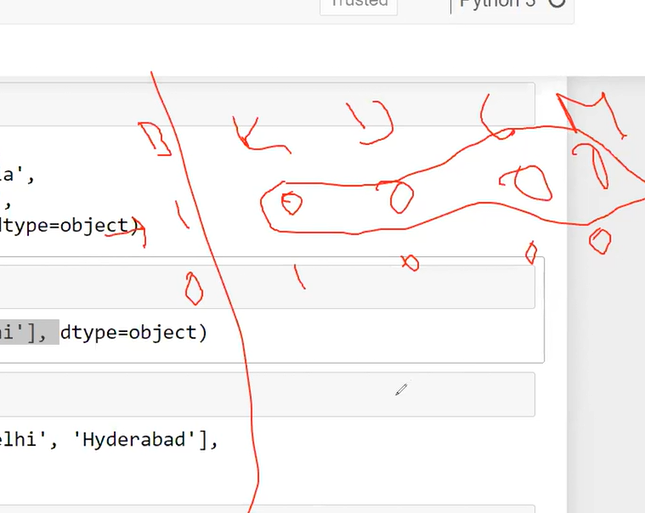

In [57]:
dataset

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0.0,No info,4107,9,4,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,2h 35m,0.0,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,3h,0.0,No info,7229,27,4,2019,11,20,8,20
10681,Vistara,Banglore,New Delhi,2h 40m,0.0,No info,12648,1,3,2019,14,10,11,30


So, here is our goal of this project. Now we can apply various machine learning algoriths on it.

### Level Encoding

In [58]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [62]:
dataset['Airline']=labelencoder.fit_transform(dataset['Airline'])
dataset['Source']=labelencoder.fit_transform(dataset['Source'])
dataset['Destination']=labelencoder.fit_transform(dataset['Destination'])
dataset['Additional_Info']=labelencoder.fit_transform(dataset['Additional_Info'])

In [63]:
dataset

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,3,0,5,2h 50m,0.0,8,3897,24,3,2019,1,10,22,20
1,1,3,0,7h 25m,2.0,8,7662,1,5,2019,13,15,5,50
2,4,2,1,19h,2.0,8,13882,9,6,2019,4,25,9,25
3,3,3,0,5h 25m,1.0,8,6218,12,5,2019,23,30,18,5
4,3,0,5,4h 45m,1.0,8,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,2h 30m,0.0,8,4107,9,4,2019,22,25,19,55
10679,1,3,0,2h 35m,0.0,8,4145,27,4,2019,23,20,20,45
10680,4,0,2,3h,0.0,8,7229,27,4,2019,11,20,8,20
10681,10,0,5,2h 40m,0.0,8,12648,1,3,2019,14,10,11,30


#### Linear regression

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [95]:
X = dataset["Total_Stops"]
y = dataset["Price"]
dataset

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_hour,Arrival_min,Dept_hour,Dept_min
0,3,0,5,2h 50m,0.0,8,3897,24,3,2019,1,10,22,20
1,1,3,0,7h 25m,2.0,8,7662,1,5,2019,13,15,5,50
2,4,2,1,19h,2.0,8,13882,9,6,2019,4,25,9,25
3,3,3,0,5h 25m,1.0,8,6218,12,5,2019,23,30,18,5
4,3,0,5,4h 45m,1.0,8,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,2h 30m,0.0,8,4107,9,4,2019,22,25,19,55
10679,1,3,0,2h 35m,0.0,8,4145,27,4,2019,23,20,20,45
10680,4,0,2,3h,0.0,8,7229,27,4,2019,11,20,8,20
10681,10,0,5,2h 40m,0.0,8,12648,1,3,2019,14,10,11,30


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

In [97]:
model = LinearRegression()
model.fit(X_train, y_train)


ValueError: Expected 2D array, got 1D array instead:
array=[2. 1. 0. ... 1. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.